In [130]:
import pandas as pd
import re
from langdetect import detect

# ÏâºÌëúÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùº ÏùΩÍ∏∞ - Î™®Îì† ÌïÑÎìúÎ•º ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú Ï≤òÎ¶¨
df = pd.read_csv('.data/parasite_reviews.csv')

print(f"Ï†ÑÏ≤¥ Î¶¨Î∑∞: {len(df)}Í∞ú")

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df)}Í∞ú")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\nÏ≤´ 10Í∞ú ÏÉòÌîå:")
print(df_review.head(10))

Ï†ÑÏ≤¥ Î¶¨Î∑∞: 1413Í∞ú
ÏòÅÏñ¥ Î¶¨Î∑∞: 1293Í∞ú

Ï≤´ 10Í∞ú ÏÉòÌîå:
                                          review_text
1   parasite is a masterful achievement that showc...
2   parasite is a remarkable film that really spea...
3   a well-crafted mix of suspenseful drama and da...
4   an unforgettable masterpiece... a cinematic ro...
7   parasite has been widely praised for its craft...
8   i don't know why but i got soo easily attached...
9   absolute dog****. you mean to tell me that thi...
11  parasite is a masterclass in directing and scr...
12  bong joon ho's masterpiece "parasite" deserves...
13  film with a particular and functional atmosphe...


In [131]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

review_text
1   parasite is a masterful achievement that showc...
2   parasite is a remarkable film that really spea...
3   a wellcrafted mix of suspenseful drama and dar...
4   an unforgettable masterpiece a cinematic rolle...
7   parasite has been widely praised for its craft...
8   i dont know why but i got soo easily attached ...
9   absolute dog you mean to tell me that this stu...
11  parasite is a masterclass in directing and scr...
12  bong joon hos masterpiece parasite deserves ev...
13  film with a particular and functional atmosphe...

In [132]:
print(f"Ï¥ù Î¶¨Î∑∞ Ïàò: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

Ï¥ù Î¶¨Î∑∞ Ïàò: 1293
empty_reviews : 0


In [133]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(10))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 135Í∞ú
ÏòàÏãú:
1     parasite is a masterful achievement that showc...
4     an unforgettable masterpiece a cinematic rolle...
7     parasite has been widely praised for its craft...
12    bong joon hos masterpiece parasite deserves ev...
15    as a huge fan of snowpiercer i had incredibly ...
28    masterpiece a gift for humanity do you want to...
36    it starts out like a fun comedy then the movie...
44    god bless joonho for his unique storytelling i...
52    a must watch movie i am now a korean movie ser...
65    togo is without a doubt a surprise hit in my o...
Name: review_text, dtype: object


In [134]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(3))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 135Í∞ú
ÏòàÏãú:
1    parasite is a masterful achievement that showc...
4    an unforgettable masterpiece a cinematic rolle...
7    parasite has been widely praised for its craft...
Name: review_text, dtype: object


In [135]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"Ïïû Í≥µÎ∞±: {leading_spaces.sum()}Í∞ú")
if leading_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[leading_spaces]['review_text'])

Ïïû Í≥µÎ∞±: 4Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [136]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"Îí§ Í≥µÎ∞±: {trailing_spaces.sum()}Í∞ú")
if trailing_spaces.sum() > 0:
    print("\nÎí§ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[trailing_spaces]['review_text'])

Îí§ Í≥µÎ∞±: 0Í∞ú


In [137]:
both_spaces = leading_spaces | trailing_spaces
print(f"ÏïûÎí§ Í≥µÎ∞± Ï¥ù: {both_spaces.sum()}Í∞ú")
if both_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[both_spaces]['review_text'])

ÏïûÎí§ Í≥µÎ∞± Ï¥ù: 4Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [138]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [139]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"Ï†úÍ±∞ ÌõÑ: {both_spaces.sum()}Í∞ú")

Ï†úÍ±∞ ÌõÑ: 0Í∞ú


In [140]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"Îã®Ïñ¥ 1-2Í∞ú Î¶¨Î∑∞: {(min_words < 3).sum()}Í∞ú")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [141]:
# import os
# from pathlib import Path
# from datetime import datetime

# # ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨ ÌôïÏù∏
# print(f"ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨: {os.getcwd()}")

# # Ï†ÄÏû• Í≤ΩÎ°úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ï
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû•
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM Ï∂îÍ∞ÄÎ°ú Excel Ìò∏ÌôòÏÑ± Í∞úÏÑ†
#     print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: {output_path}")
#     print(f"üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: {len(df_review)}")
# except Exception as e:
#     print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {e}")
#     # ÎåÄÏïà: Ìôà ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"‚úÖ ÎåÄÏ≤¥ Í≤ΩÎ°úÏóê Ï†ÄÏû•: {home_path}")

In [142]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                               tokens  
1   [parasite, is, a, masterful, achievement, that...  
2   [parasite, is, a, remarkable, film, that, real...  
3   [a, wellcrafted, mix, of, suspenseful, drama, ...  
4   [an, unforgettable, masterpiece, a, cinematic,...  
7   [parasite, has, been, widely, praised, for, it...  
8   [i, dont, know, why, but, i, got

In [143]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'parasite', 'films',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

1       [masterful, achievement, showcases, bong, joon...
2       [remarkable, really, speaks, nature, capitalis...
3       [wellcrafted, mix, suspenseful, drama, dark, h...
4       [unforgettable, masterpiece, cinematic, roller...
7       [widely, praised, craftsmanship, good, reason,...
                              ...                        
1408    [bong, joon, hos, cannes, winner, fantasticall...
1409    [wildride, entertainment, thats, turns, funny,...
1410    [seals, serious, case, bong, joonho, one, grea...
1411    [latest, bong, joon, ho, funny, thrilling, poi...
1412    [capital, invades, lifes, private, spaces, ful...
Name: filtered_tokens, Length: 1293, dtype: object


In [145]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [146]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [147]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['masterful', 'achievement', 'showcase', 'bong', 'joonhos', 'exceptional', 'directing', 'prowess', 'storytelling', 'brilliance', 'deserves', 'every', 'accolade', 'received', 'directing', 'cinematography', 'bong', 'joonhos', 'direction', 'meticulous', 'purposeful', 'every', 'shot', 'serf', 'narrative', 'particularly', 'use', 'vertical', 'space', 'reinforce', 'class', 'division', 'park', 'elevated', 'mansion', 'kims', 'semibasement', 'dwelling', 'camera', 'movement', 'deliberate', 'creating', 'tension', 'simple', 'pan', 'tilt', 'rain', 'sequence', 'cinematographically', 'stunning', 'using', 'weather', 'plot', 'device', 'visual', 'metaphor', 'production', 'design', 'seamlessly', 'integrates', 'cinematography', 'create', 'distinct', 'world', 'feel', 'authentic', 'yet', 'symbolic', 'script', 'storytelling', 'screenplay', 'structural', 'marvel', 'defies', 'genre', 'convention', 'maintaining', 'perfect', 'narrative', 'cohesion', 'begin', 'dark', 'comedy', 'gradually', 'transforms', 'thriller

In [148]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [149]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):")
print(df[['review_text', 'pos_tags']].head(10))

POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):
                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                             pos_tags  
1   [(masterful, JJ), (achievement, NN), (showcase...  
2   [(remarkable, JJ), (really, RB), (speaks, JJ),...  
3   [(wellcrafted, VBN), (mix, NN), (suspenseful, ...  
4   [(unforgettable, JJ), (masterpiece, NN), (cine...  
7   [(widely, RB), (praised, VBN), (craftsmanship,...  
8 

In [150]:
import pandas as pd
from datetime import datetime

# --- Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû• (Í∞ÑÎã® Î≤ÑÏ†Ñ) ---

df_complete = df[['review_text', 'filtered_tokens', 'pos_tags']].copy()

# Í∞Å Ïª¨ÎüºÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
df_complete['filtered_tokens_str'] = df_complete['filtered_tokens'].apply(lambda x: ' '.join(x))
df_complete['pos_tags_str'] = df_complete['pos_tags'].apply(
    lambda tags: ' '.join([f"{token}/{tag}" for token, tag in tags])
)

# ÏµúÏ¢Ö Ï†ÄÏû• (Î¶¨Ïä§Ìä∏ Ïª¨Îüº Ï†úÏô∏, 3Í∞ú Ïª¨ÎüºÎßå)
df_final_complete = df_complete[[
    'review_text', 
    'filtered_tokens_str', 
    'pos_tags_str'
]]

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'preprocessed_parasite_complete_{timestamp}.csv'

df_final_complete.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: {output_file}")
print(f"üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: {len(df_final_complete)}")
print(f"\nüìã Ï†ÄÏû•Îêú Ïª¨Îüº:")
for i, col in enumerate(df_final_complete.columns, 1):
    print(f"  {i}. {col}")

print(f"\nüìÑ Ï≤´ 3Í∞ú ÏÉòÌîå:")
print(df_final_complete.head(3))

‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: preprocessed_parasite_complete_20251019_225921.csv
üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: 1293

üìã Ï†ÄÏû•Îêú Ïª¨Îüº:
  1. review_text
  2. filtered_tokens_str
  3. pos_tags_str

üìÑ Ï≤´ 3Í∞ú ÏÉòÌîå:
                                         review_text  \
1  parasite is a masterful achievement that showc...   
2  parasite is a remarkable film that really spea...   
3  a wellcrafted mix of suspenseful drama and dar...   

                                 filtered_tokens_str  \
1  masterful achievement showcases bong joonhos e...   
2  remarkable really speaks nature capitalism eve...   
3  wellcrafted mix suspenseful drama dark humour ...   

                                        pos_tags_str  
1  masterful/JJ achievement/NN showcases/NNS bong...  
2  remarkable/JJ really/RB speaks/JJ nature/NN ca...  
3  wellcrafted/VBN mix/NN suspenseful/JJ drama/NN...  


In [151]:
my_tag_set = ['NN','NNS', 'NNP']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['family', 'story', 'class', 'way', 'time', 'people', 'plot', 'characters', 'watch', 'masterpiece', 'comedy', 'cinematography', 'joonho', 'year', 'something', 'picture', 'director', 'work', 'thriller', 'life']


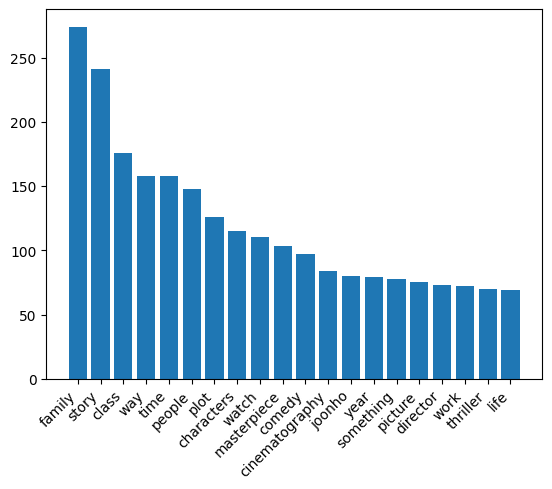

In [152]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

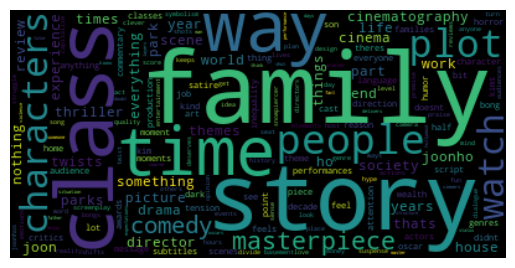

In [153]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

ÏòÅÏñ¥ Î¶¨Î∑∞: 1295Í∞ú


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê (Îã®Ïñ¥Îßå Ï∂úÎ†•) ---

[CountVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]
['family', 'story', 'class', 'time', 'way', 'people', 'character', 'plot', 'year', 'watch', 'life', 'park', 'masterpiece', 'comedy', 'work', 'director', 'cinematography', 'joonho', 'scene', 'picture']

[TfidfVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]
['story', 'time', 'class', 'masterpiece', 'family', 'way', 'plot', 'year', 'watch', 'people', 'comedy', 'review', 'character', 'picture', 'life', 'director', 'work', 'joonho', 'oscar', 'thriller']


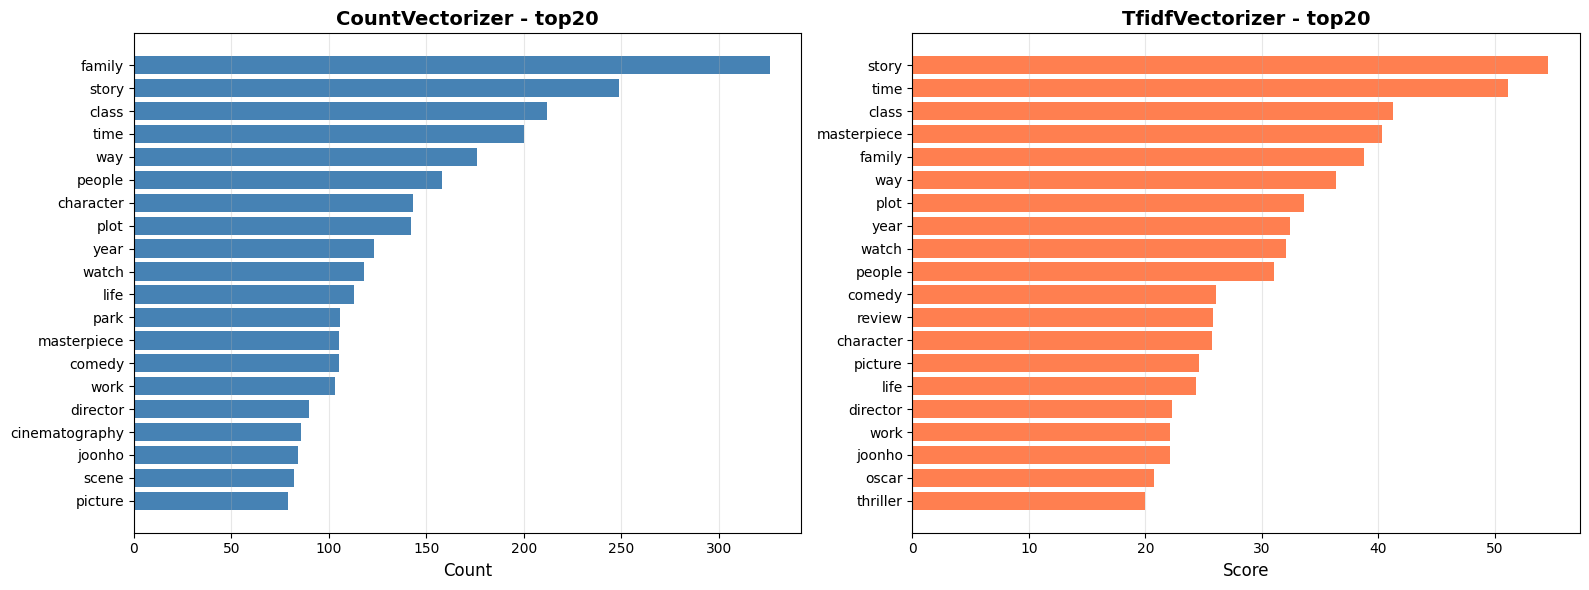

In [154]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV ÌååÏùº ÏùΩÍ∏∞
df = pd.read_csv('.data/parasite_reviews.csv')

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# ÏòÅÏñ¥ Î¶¨Î∑∞Îßå ÌïÑÌÑ∞ÎßÅ
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df_review)}Í∞ú")

# Stopwords ÏÑ§Ï†ï
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'parasite', 'films',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP'}

def preprocess_text(text):
    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (ÏòÅÎ¨∏Ïûê, Ïà´Ïûê, Í≥µÎ∞±Îßå Ïú†ÏßÄ)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    # 2. ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(text)

    # 3. Stopwords Ï†úÍ±∞ Î∞è Í∏∏Ïù¥ ÌïÑÌÑ∞ÎßÅ
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # 4. Lemmatization (ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 5. POS Tagging & ÌïÑÌÑ∞ÎßÅ
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]

    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer Ïã§Ìñâ
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer Ïã§Ìñâ
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()


# --- Í∞Å ÌñâÎ†¨Ïùò Îã®Ïñ¥Î≥Ñ Ï¥ùÌï©ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎäî Ìï®Ïàò ---
def get_top_n_features(feature_names, matrix, n=20):
    # Í∞Å Îã®Ïñ¥(feature)Ïùò Ï†êÏàòÎ•º Î™®Îëê ÎçîÌï©ÎãàÎã§.
    sum_features = matrix.sum(axis=0)

    # Îã®Ïñ¥ Ïù¥Î¶ÑÍ≥º Ï†êÏàòÎ•º ÏßùÏßÄÏñ¥ DataFrameÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
    features_df = pd.DataFrame(sum_features, columns=feature_names).T
    features_df.columns = ['score']

    # Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÏÉÅÏúÑ nÍ∞úÎ•º Î∞òÌôòÌï©ÎãàÎã§.
    return features_df.sort_values(by='score', ascending=False).head(n)

# --- 5. Í≤∞Í≥º Ï∂úÎ†• (Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Îßå) ---
print("\n--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê (Îã®Ïñ¥Îßå Ï∂úÎ†•) ---")

# CountVectorizer Í≤∞Í≥º (Îã®Ïàú ÎπàÎèÑ Ìï©Í≥Ñ Í∏∞Ï§Ä)
cv_top_keywords = get_top_n_features(cv_top_features, cv_matrix)
print("\n[CountVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]")
print(cv_top_keywords.index.tolist()) # .index.tolist() Ï∂îÍ∞Ä!


# TfidfVectorizer Í≤∞Í≥º (TF-IDF Ï†êÏàò Ìï©Í≥Ñ Í∏∞Ï§Ä)
tfidf_top_keywords = get_top_n_features(tfidf_top_features, tfidf_matrix)
print("\n[TfidfVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]")
print(tfidf_top_keywords.index.tolist()) # .index.tolist() Ï∂îÍ∞Ä!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CountVectorizer ÎßâÎåÄ Í∑∏ÎûòÌîÑ
cv_words = cv_top_keywords.index.tolist()
cv_scores = cv_top_keywords['score'].tolist()

ax1.barh(cv_words[::-1], cv_scores[::-1], color='steelblue')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('CountVectorizer - top20', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# TfidfVectorizer ÎßâÎåÄ Í∑∏ÎûòÌîÑ
tfidf_words = tfidf_top_keywords.index.tolist()
tfidf_scores = tfidf_top_keywords['score'].tolist()

ax2.barh(tfidf_words[::-1], tfidf_scores[::-1], color='coral')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_title('TfidfVectorizer - top20', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [155]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA Î™®Îç∏ ÏÉùÏÑ±
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # Í≤∞Í≥º Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï
    update_every=1,
    chunksize=100,
    passes=10, # Ï†ÑÏ≤¥ ÏΩîÌçºÏä§Î•º Î™á Î≤à Î∞òÎ≥µ ÌïôÏäµÌï†ÏßÄ Í≤∞Ï†ï
    alpha='auto',
    per_word_topics=True
)

print("LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# --- 4. Í≤∞Í≥º ÌôïÏù∏ Î∞è ÏãúÍ∞ÅÌôî ---

# 4-1. ÌÖçÏä§Ìä∏Î°ú ÌÜ†ÌîΩ ÌôïÏù∏
print("\n--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---")
topics = lda_model.print_topics(num_words=10) # Í∞Å ÌÜ†ÌîΩÎ≥ÑÎ°ú 10Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
for topic in topics:
    print(topic)

# 4-2. pyLDAvisÎ•º ÏÇ¨Ïö©Ìïú Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏãúÍ∞ÅÌôî
print("\nLDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visualization.html' ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.

--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---
(0, '0.046*"review" + 0.026*"picture" + 0.017*"piece" + 0.016*"bit" + 0.013*"part" + 0.011*"doesnt" + 0.011*"history" + 0.010*"joonhos" + 0.010*"offer" + 0.009*"get"')
(1, '0.049*"story" + 0.035*"way" + 0.031*"time" + 0.024*"year" + 0.024*"comedy" + 0.018*"watch" + 0.018*"thriller" + 0.017*"thing" + 0.017*"character" + 0.016*"work"')
(2, '0.024*"oscar" + 0.015*"anything" + 0.015*"star" + 0.013*"hype" + 0.012*"act" + 0.011*"picture" + 0.011*"mean" + 0.010*"create" + 0.009*"plot" + 0.009*"others"')
(3, '0.077*"family" + 0.023*"park" + 0.015*"people" + 0.014*"house" + 0.013*"life" + 0.012*"job" + 0.010*"day" + 0.009*"son" + 0.009*"home" + 0.009*"suspense"')
(4, '0.033*"class" + 0.019*"director" + 0.019*"masterpiece" + 0.019*"joonho" + 0.018*"people" + 0.016*"ho" + 0.014*"joon" + 0.012*"society" + 0.012*"audience" + 0.011*"world"')

LDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visualization.html' ÌååÏùºÎ°ú Ï†Ä

c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.246389 -0.128776       1        1  31.590802
1      0.185081  0.217697       2        1  26.533658
3     -0.069641 -0.248194       3        1  22.135285
0     -0.244115 -0.015143       4        1  10.459167
2     -0.117715  0.174416       5        1   9.281088, topic_info=          Term        Freq       Total Category  logprob  loglift
91      family  244.000000  244.000000  Default  30.0000  30.0000
69       story  189.000000  189.000000  Default  29.0000  29.0000
582     review   69.000000   69.000000  Default  28.0000  28.0000
71         way  139.000000  139.000000  Default  27.0000  27.0000
13      comedy   92.000000   92.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
473    opinion    8.347131   11.025468   Topic5  -5.0682   2.0989
155    picture   14.410579   54.025471   Topic5  -4.5222   1.0557
45        plot   12.003081   91.696874   Topic5  -4.7050   0.3439
8    character    9.715339  104.848953   Topic5  -4.9164  -0.0016
191        fan    6.545326   11.872726   Topic5  -5.3114   1.7817

[231 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
667       5  0.961775       act
78        1  0.980422     actor
903       4  0.951275  analysis
289       1  0.978335    anyone
616       5  0.977079  anything
...     ...       ...       ...
327       1  0.029879      year
327       2  0.926253      year
327       4  0.019919      year
327       5  0.019919      year
1318      5  0.883606       yes

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])